In [223]:
import numpy as np
import matplotlib.pyplot as plt

In [224]:
np.random.seed(0)
x = np.linspace(0,10,200)
y = np.sin(2*x) + 0.3 * np.random.randn(200)

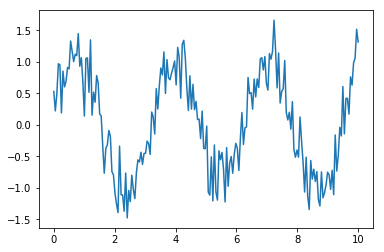

In [225]:
plt.plot(x,y)

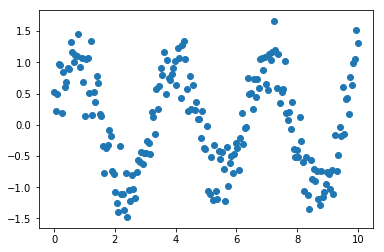

In [226]:
plt.scatter(x,y)

In [227]:
x_train = (x - np.min(x)) / (np.max(x)-np.min(x))
y_train = (y - np.min(y)) / (np.max(y)-np.min(y))

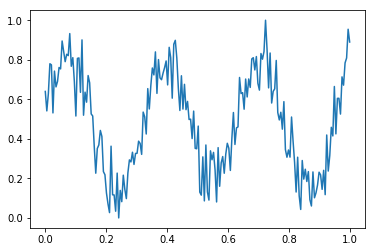

In [228]:
plt.plot(x_train, y_train)
plt.show()

In [229]:
x_train.shape

(200,)

In [230]:
from keras.models import Sequential
from keras.layers import Dense

In [523]:
model = Sequential()

In [524]:
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [525]:
from keras import optimizers

In [526]:
#opt = optimizers.adam(lr=0.1, decay=0.1)
opt = optimizers.SGD(lr=0.01, momentum=0.99)

In [527]:
model.compile(loss='mse',
             optimizer=opt,
             metrics=['mean_squared_error'])

In [528]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_188 (Dense)            (None, 64)                128       
_________________________________________________________________
dense_189 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_190 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_191 (Dense)            (None, 1)                 33        
Total params: 3,297
Trainable params: 3,297
Non-trainable params: 0
_________________________________________________________________


In [529]:
model.fit(x_train, y_train, 
          batch_size=32,
          epochs=1000,
          verbose=0)

In [530]:
y_pred = model.predict(x_train, batch_size=32)
y_pred = y_pred * (np.max(y)-np.min(y)) + np.min(y)

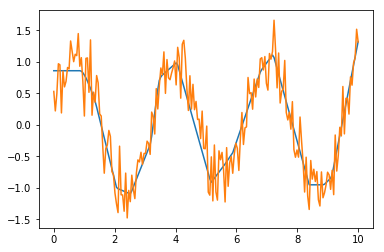

In [531]:
plt.plot(x, y_pred)
plt.plot(x, y)
plt.show()